# Análisis económico implementando Fred API

In [42]:
!pip install fredapi > /dev/null

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_key = 'aab0234034696f00f5318044efd72074'

## Creamos el objeto Fred

In [44]:
fred = Fred(api_key = fred_key)

#Buscamos los datos

In [45]:
sp_search = fred.search('S&P', order_by='popularity')

In [46]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-07-13,2023-07-13,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-07-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-13 07:07:11-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-07-13,2023-07-13,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-06-27 08:13:02-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-07-13,2023-07-13,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-07-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-13 07:07:15-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-07-13,2023-07-13,S&P 500,2013-07-15,2023-07-13,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-07-13 19:10:53-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-07-13,2023-07-13,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


# Extraemos los datos brutos y graficación

In [47]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

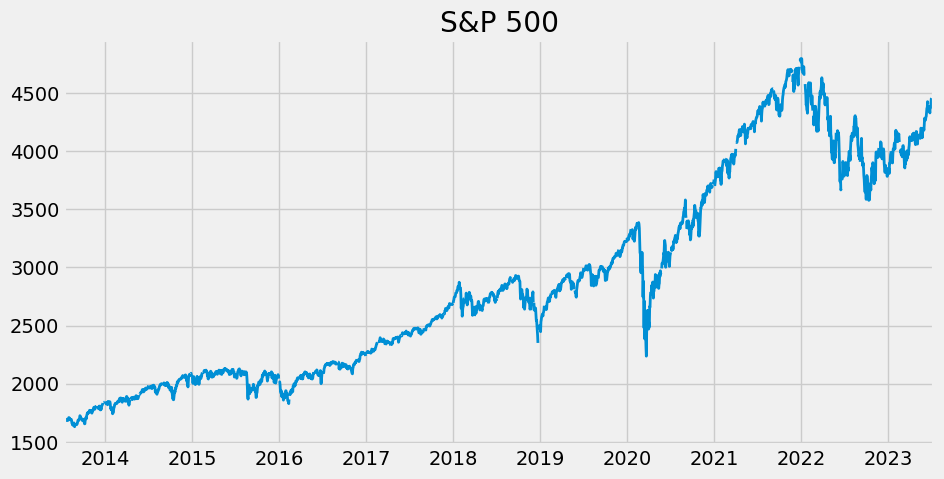

In [48]:
sp500.plot(figsize = (10,5), title = 'S&P 500',lw = 2)

# Extraemos y juntamos difertentes series de datos

In [49]:
unemp_df = fred.search('unemployment state', filter = ('frequency', 'Monthly'))
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Tasa de desempleo')]


In [51]:
all_results = []
for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name = myid)
  all_results.append(results)
  time.sleep(1)


KeyError: ignored

In [56]:
uemp_results = pd.concat(all_results, axis = 1)
uemp_results

,UNRATE,UNRATENSA,LNS14000006,LNU04000006,CAUR,CAURN,M0892AUSM156SNBR,M0892BUSM156SNBR,M0892CUSM156NNBR,FLUR,TXUR,FLURN,LNS14000031,TXURN,U2RATE,LNS14000002,NYUR,LNU04000031,U2RATENSA,LNU04000002,NYURN,LNS14000009,LNU04032231,LNS14000024,LNU04000009,LNU04000024,LNS14000003,CALOSA7URN,LNU04000003,CGBD2534,MIUR,LNS14000001,MIURN,OHUR,LNU04032232,PAUR,LNU04000001,ILURN,ILUR,NCUR,PAURN,OHURN,LNS14027662,NCURN,ALUR,MAUR,ALURN,LNU04027662,NJURN,NJUR,COUR,LNS14024887,MAURN,LNS14027660,VAUR,COURN,LNU04024887,FLMIAM6URN,VAURN,MNUR,LNU04027660,GAUR,MNURN,MOUR,LNU04032183,CHIC917URN,LNS14032183,KYURN,SEAT653URN,KYUR,GAURN,MOURN,WAUR,SEAT653UR,CHIC917UR,WAURN,CASANF0URN,NASH947URN,LAUR,DALL148URN,HOUS448URN,WIUR,ARUR,OKUR,LAURN,WVUR,UTUR,DALL148UR,ATLA013URN,HOUS448UR,NMUR,UTURN,NMURN,TNUR,ORUR,OKURN,AUST448URN,WIURN,ARURN,INELKH0URN,WVURN,ATLA013UR,TNURN,NVUR,ORURN,AUST448UR,SCUR,LNU04074597,NVURN,DENV708URN,AZUR,MDUR,SCURN,NEURN,LRUN64TTUSM156S,PAPHIL5URN,WIMILW5URN,NEUR,PRURN,PRUR,LRUN64TTUSM156N,MDURN,AZURN,IAUR,DENV708UR,LNS14000012,PHOE004UR,PHOE004URN,IAURN,MSUR,LNU04000012,DETR826URN,BOST625URN,MINN427URN,ILCOOK1URN,LASMT261982000000003,CASAND5URN,MSURN,DETR826UR,MINN427UR,BOST625UR,INUR,STLUR,HIUR,LNS14027659,WASH911URN,JACK212URN,TXHARR1URN,AZMARI3URN,VAFAIR5URN,NYBRON5URN,HIURN,INURN,STLURN,LNU04027659,LNS14000018,CLEV439URN,LASV832URN,WASH911UR,KANS129UR,TAMP312URN,NDUR,JACK212UR,CAORAN7URN,KANS129URN,LASMT391746000000003,LOSA106UR,PORT941UR,LOSA106URN,CLEV439UR,DCUR,LNU04000018,LASV832UR,PORT941URN,CGMD25O,TAMP312UR,NDURN,MTUR,CTUR,CHAR737URN,LOIUR,DCDIST5URN,DCURN,LNU04000060,COLU139URN,LNS14000060,LOIURN,MTURN,CTURN,CHAR737UR,ORLA712URN,COLU139UR,KSUR,MPHUR,SANF806UR,SANA748UR,MPHURN,KSURN,TXDALL3URN,SANF806URN,SANA748URN,PITT342UR,ORLA712UR,PITT342URN,AKUR,LRHUTTTTUSM156S,MIAM112URN,MDBALT5URN,NYKING7URN,AKURN,MIAM112UR,LRHUTTTTUSM156N,WYUR,MEUR,LNU04035109,CGBD2024,LNU04032239,NHUR,ROCH336URN,OHCUYA5URN,NVCLAR3URN,WYURN,MEURN,NHURN,INDI918URN,DEUR,ROCH336UR,LNU04032238,NEWY636URN,CARIVE5URN,CMWRUR,DEURN,FLDUVA0URN,INDI918UR,CASANB1URN,CASANT5URN,NEWY636UR,CMWRURN,OMAH531UR,SDUR,FLIN426URN,KNOX947URN,SDURN,OMAH531URN,KNOX947UR,FLIN426UR,SANJ906URN,LNS14000036,WAKING5URN,CAFRES9URN,...,VIRG251URN,OXNA106URN,LNU04000089,HART409UR,WASKAG5URN,WACLAR1URN,WASNOH0URN,PHIL942UR,VIRG251UR,GAGORD9URN,ROME613URN,GAPULA5URN,GABLEC3URN,GACLAR5URN,GATWIG9URN,GAPEAC5URN,GAMACO3URN,GADOOL3URN,GAGWIN7URN,SAVA313URN,GACOFF9URN,AUGU213URN,WATE709URN,HIKAUA7URN,TXTRAV3URN,ILCUMB5URN,TXJEFF5URN,MNANOK5URN,TXGALV7URN,LNU04032217,VAPETE0URN,FLCLAY5URN,LNU04049526,NVWASH7URN,TXDENT2URN,CHAR851URN,PAMONT5URN,TXMCLE9URN,SCLEXI0URN,IDADAC1URN,DAYT339URN,NCWILS0URN,RENO932URN,TXWILL5URN,NYWEST9URN,WIROCK0URN,WIDANE5URN,DESUSS0URN,GREE508URN,MODE706URN,MSHIND9URN,BAKE506URN,DOTH001URN,NYALBA1URN,FLAG304URN,SCANDE7URN,KYWAURN,TNWILL0URN,MDCHAR0URN,NMLEAC0URN,CASHAS5URN,VAACCO1URN,TXROCK7URN,NYERIE9URN,ALTUSC2URN,COBOUL3URN,MDALLE0URN,OHSHEL9URN,WYCARB7URN,MIOTTA0URN,FLPASC5URN,TXKAUF7URN,MTJEFF3URN,NYSULL5URN,VAMANA3URN,UTWEBE7URN,SCLAUR5URN,MDKENT9URN,FLSARA5URN,NCCABA5URN,WAUS155URN,PAYORK0URN,OHATHE5URN,NCHERT1URN,CAMEND5URN,STOC706UR,NYNIAG3URN,UTIRON1URN,NMSOCO3URN,KYCOURN,MIJACK0URN,OHDEFI9URN,MAHAMP0URN,KYMHURN,FLBRAD7URN,MNDAKO5URN,VASHEN1URN,WIDODG5URN,NCMART7URN,NMBERN1URN,CAYUBA5URN,SCDARL5URN,NYLEWI9URN,MOJASP5URN,MYRT845UR,MACO413UR,ASHE737UR,ASHE737URN,KYDAURN,ROAN251UR,ABIL148URN,SYRA036URN,PABUCK5URN,VACHES5URN,TUCS004URN,MIGENE9URN,ROME613UR,SAVA313UR,MACO413URN,AUGU213UR,ROAN251URN,WATE709UR,CHAR851UR,DAYT339UR,RENO932UR,MDSOME9URN,GREE508UR,MODE706UR,KSFINN5URN,BAKE506UR,DOTH001UR,WYTETO9URN,FLAG304UR,ABIL148UR,MISHIA0URN,WAUS155UR,SYRA036UR,NDWARD0URN,NCHALI0URN,TUCS004UR,KYOHURN,CHAT847URN,CHAT847UR,VAHIGH1URN,BATT926URN,VAVIRG5URN,LRUN24TTUSM156S,MOSSURN,LASTMA5URN,VAPRIN3URN,LRUN74TTUSM156S,CASANB9URN,BATT926UR,LRUN24TTUSM156N,SALT649URN,MDSTMA5URN,SHER348URN,LRUN74TTUSM156N,STOC706URN,ELKH118URN,LNS14000315,FLOR501URN,LNU0403223

In [63]:
cols_to_drop = []

for i in uemp_results:
  if len(i) > 4:
    cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis = 1)

In [70]:
uemp_states = uemp_results.copy()
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [71]:
px.line(uemp_states)

# ¿Que pasó en abril del 2020?

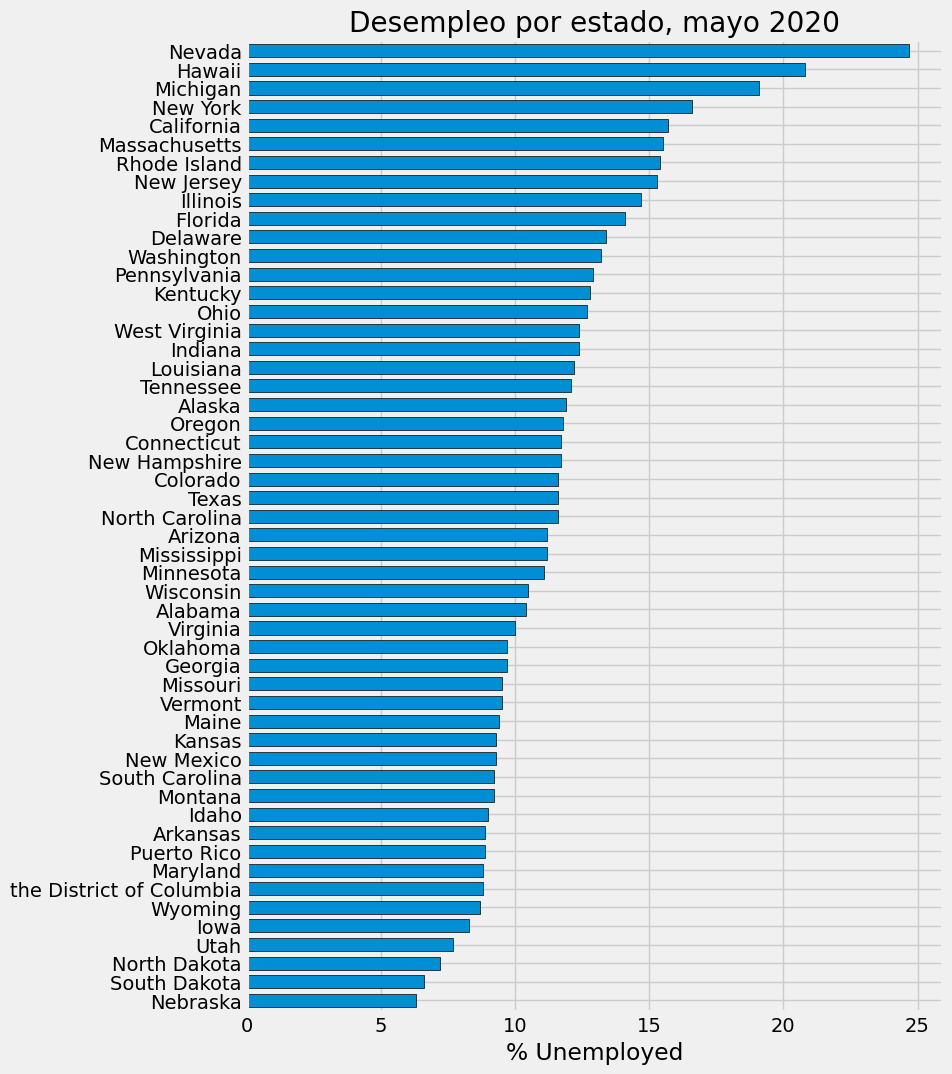

In [72]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Desempleo por estado, mayo 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Tasa de participación

In [73]:
part_df =fred.search('participation rate state', filter = ('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [74]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(1)

part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Grafica comparativa entre el desempleo y la participación por estado

In [76]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

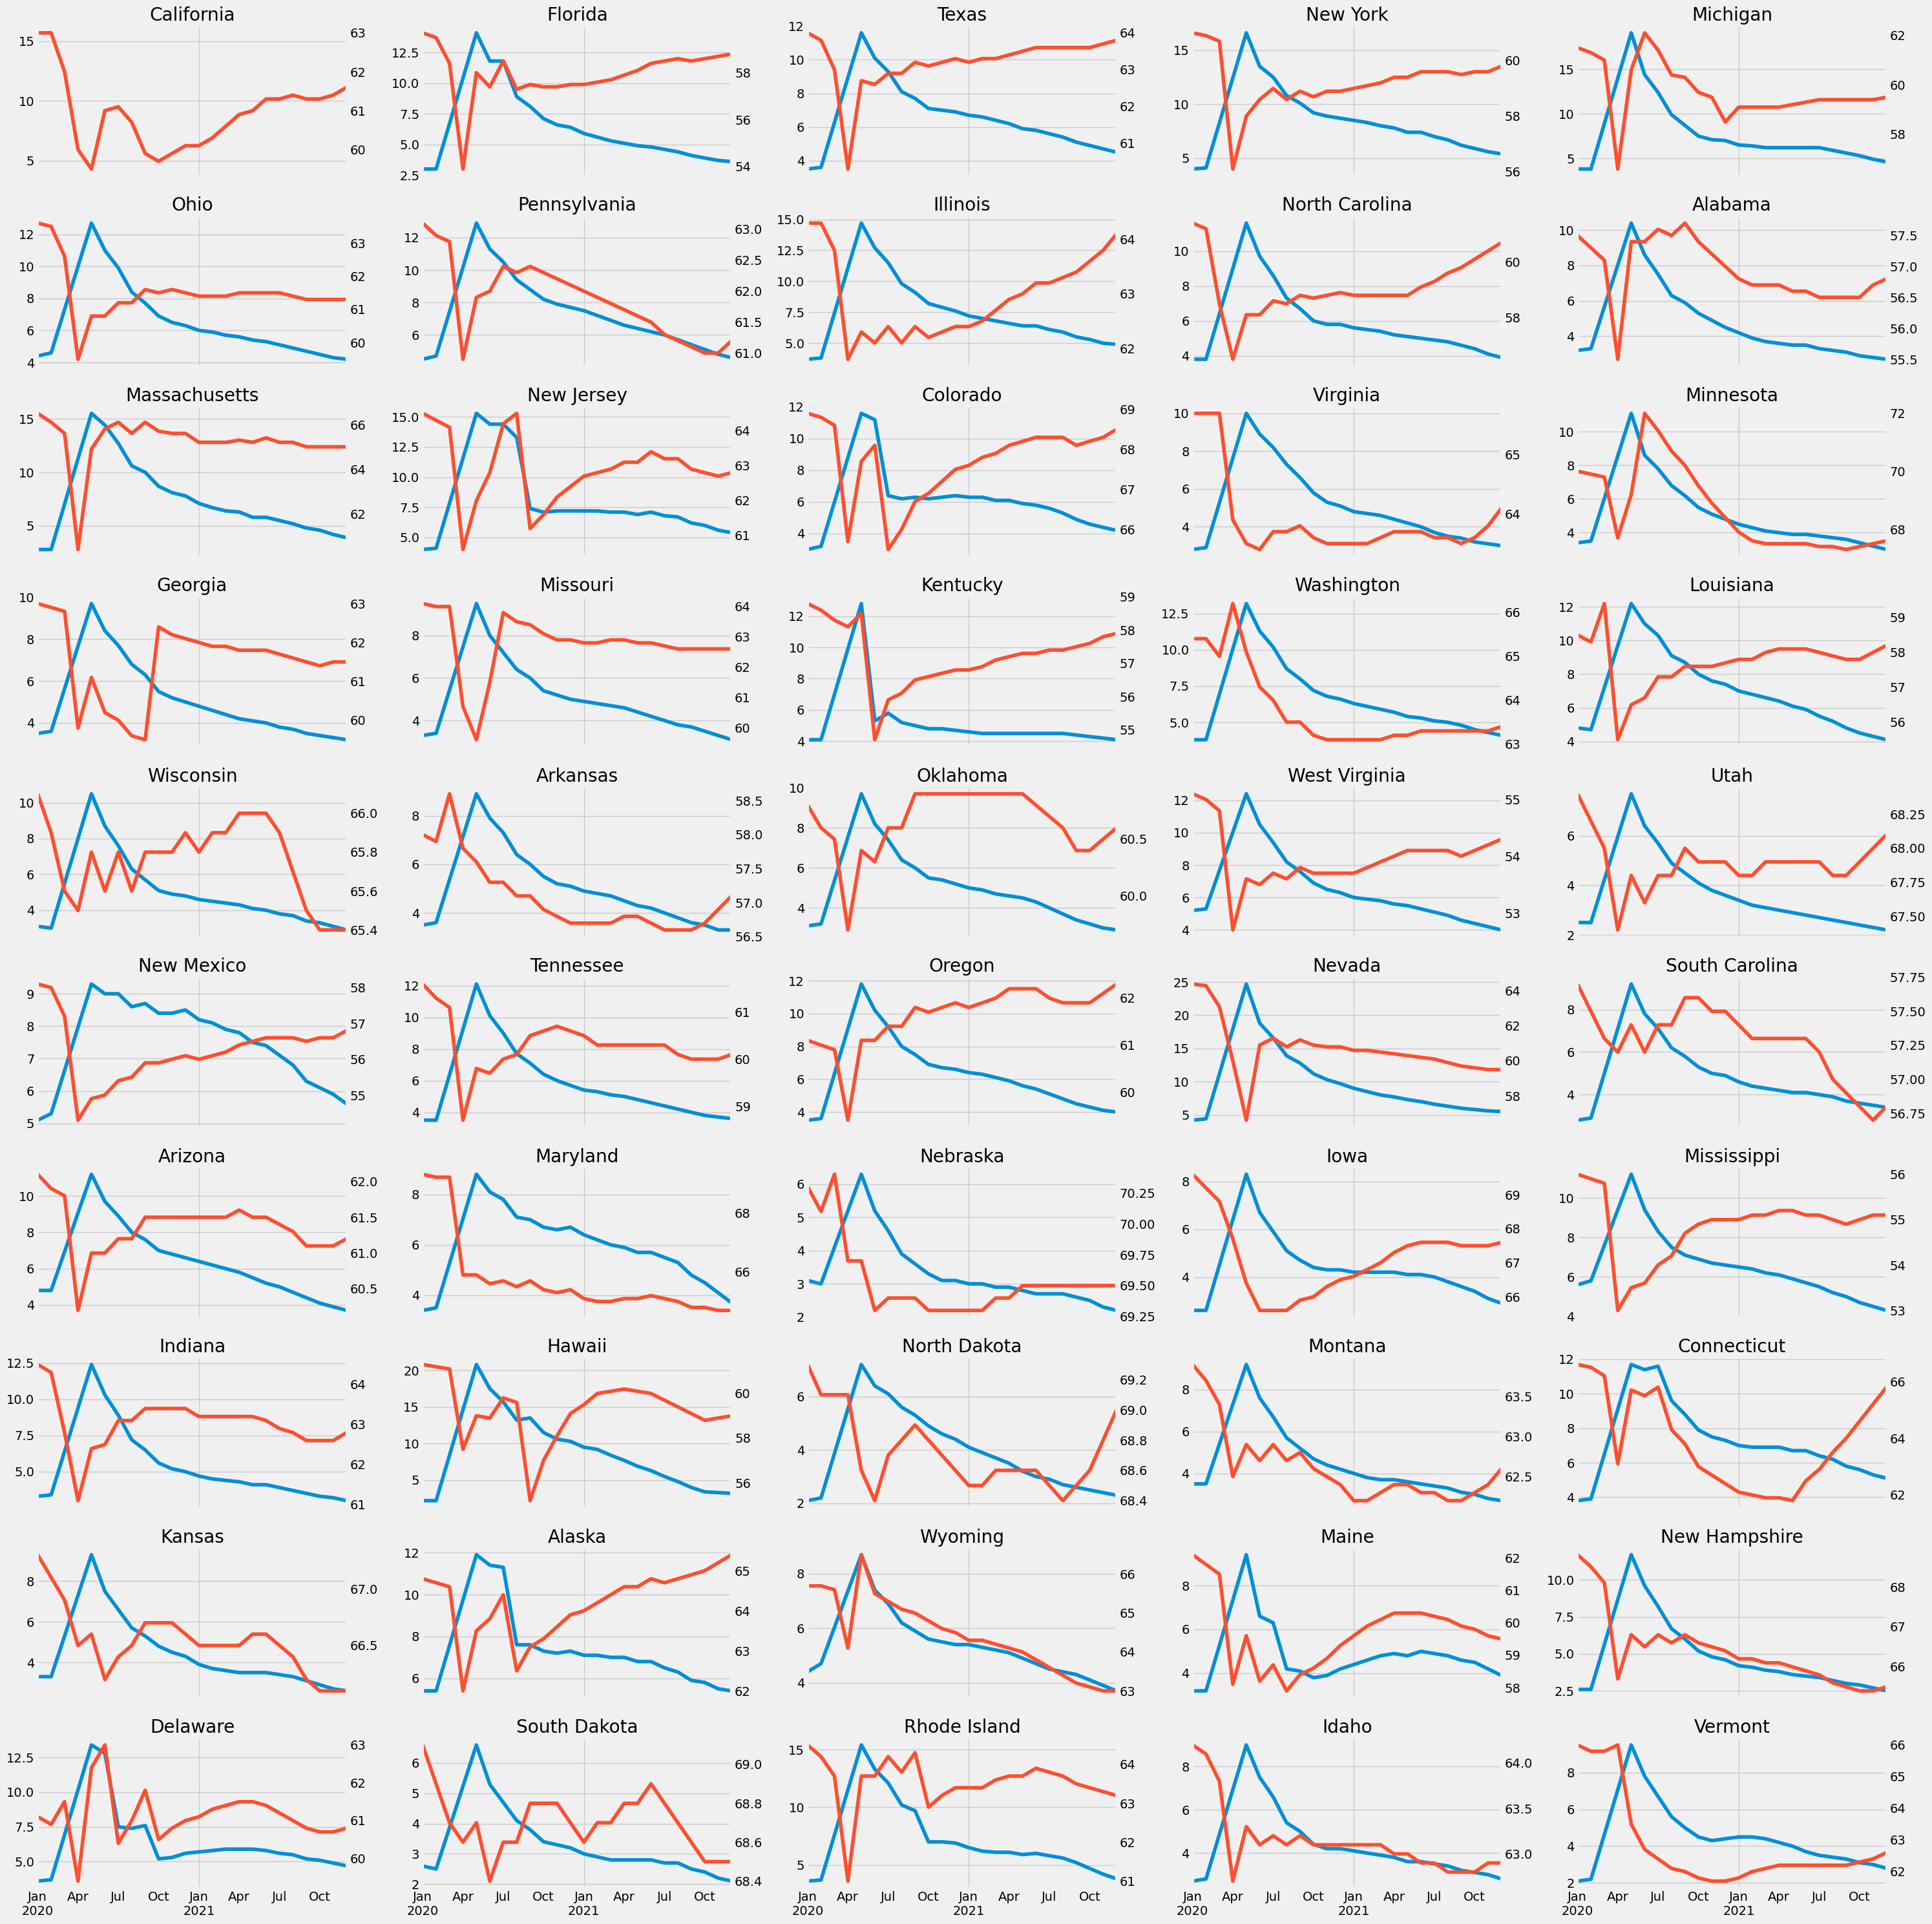

In [83]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

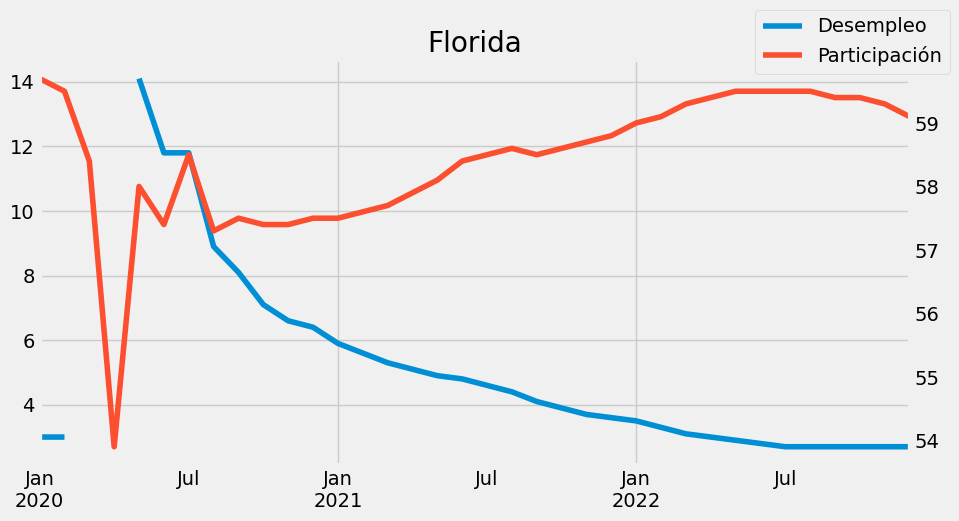

In [80]:
state = 'Florida'
fig, ax = plt.subplots(figsize = (10,5), sharex = True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2023')[state].plot(ax=ax, label = 'Desempleo')
l2 = part_states.dropna().query('index >= 2020 and index < 2023')[state].plot(ax = ax2, label = 'Participación', color = color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Desempleo','Participación'])
plt.show()